In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 
%matplotlib inline

In [2]:
# importing the data set and have a quick look
df=pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
#importing the second cvs file which is helpful to know better each column of main cvs file
schema=pd.read_csv('survey_results_schema.csv')
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [4]:
df["CompTotal"]

0          4800.0
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
83434    160500.0
83435    200000.0
83436      1800.0
83437     90000.0
83438      7700.0
Name: CompTotal, Length: 83439, dtype: float64

The first thing that I am interested to know more about it is: how is education level of developers in each country. So, let's focus on "EdLevel" column in more details:

In [5]:
# .3 percent null value in education level column which is fairly
df['EdLevel'].isnull().sum()/df.shape[0]

0.0037512434233392057

In [6]:
df['EdLevel'].value_counts()/df.shape[0]

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.423747
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.209878
Some college/university study without earning a degree                                0.126907
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.114263
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.030765
Primary/elementary school                                                             0.029710
Associate degree (A.A., A.S., etc.)                                                   0.026738
Something else                                                                        0.019188
Professional degree (JD, MD, etc.)                                                    0.015053
Name: EdLevel, dtype: float64

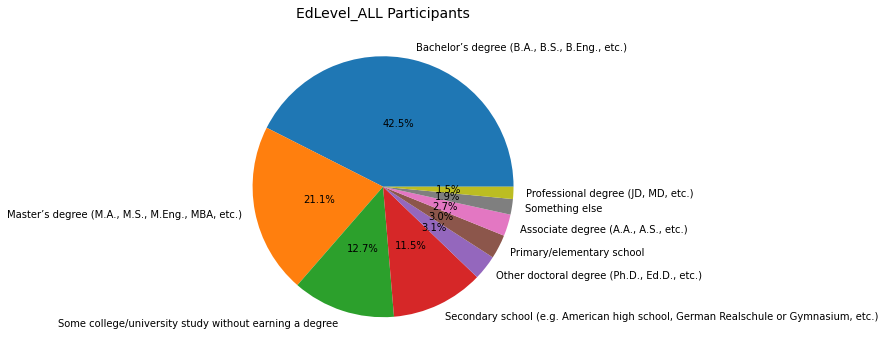

In [7]:
pie, ax = plt.subplots(figsize=[10,6])
data=df['EdLevel'].value_counts()
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("EdLevel_ALL Participants", fontsize=14);
plt.show()

More than 40% of participants in survey hold Bachelor's Degree, which is aggregate number for all participants from all countries. Specifically, I am interested to find this statistics for USA and Canada In the first part of my first question: *I am interested to find Education Level for USA and Canada*.

In the second part: If the "PhD" group have some specific advantage in some attributes in comparison to the others group ?

So: here is summary of question 1:

### Question 1: What is Education Level for participants from Canada and USA specifically? If there are specific parameter which help individuals to be full time employed?

In [8]:
df_Canada=df[df['Country']=='Canada']

In [9]:
df_Canada['EdLevel'].value_counts()/df_Canada.shape[0]

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.426295
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.149070
Some college/university study without earning a degree                                0.137782
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.098938
Associate degree (A.A., A.S., etc.)                                                   0.060425
Primary/elementary school                                                             0.051461
Something else                                                                        0.034529
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.029548
Professional degree (JD, MD, etc.)                                                    0.008300
Name: EdLevel, dtype: float64

In [10]:
df['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: Country, Length: 181, dtype: int64

In [11]:
df_USA=df[df['Country']=='United States of America']

In [12]:
df_USA['EdLevel'].value_counts()/df_USA.shape[0]

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.478480
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.168629
Some college/university study without earning a degree                                0.137886
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.072410
Associate degree (A.A., A.S., etc.)                                                   0.041732
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.039704
Primary/elementary school                                                             0.036041
Something else                                                                        0.014129
Professional degree (JD, MD, etc.)                                                    0.006214
Name: EdLevel, dtype: float64

<Figure size 432x288 with 0 Axes>

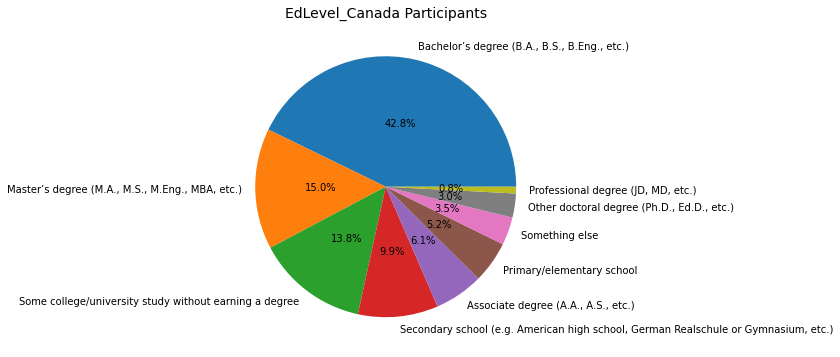

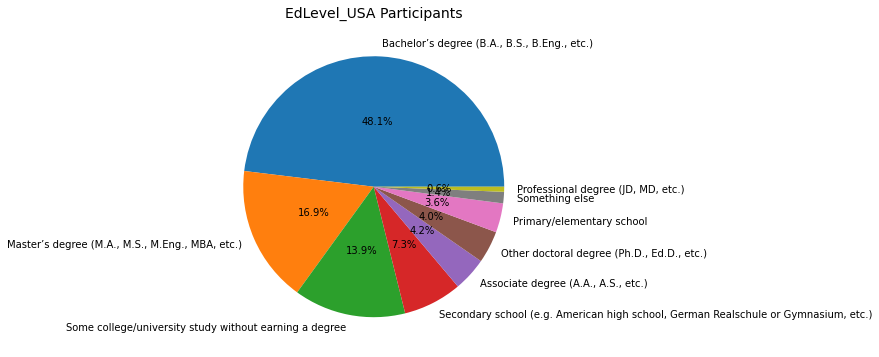

In [13]:
plt.figure(0);
pie, ax = plt.subplots(figsize=[10,6]);
data_Canada=df_Canada['EdLevel'].value_counts();
labels = data_Canada.keys();
plt.pie(x=data_Canada, autopct="%.1f%%", labels=labels, pctdistance=0.5);
plt.title("EdLevel_Canada Participants", fontsize=14);

plt.figure(1);
pie, ax = plt.subplots(figsize=[10,6]);
data_USA=df_USA['EdLevel'].value_counts();
labels = data_USA.keys();
plt.pie(x=data_USA, autopct="%.1f%%", labels=labels, pctdistance=0.5);
plt.title("EdLevel_USA Participants", fontsize=14);

plt.show();

Now, I am interested to see if PhD degree could have impact on better job market situation in USA in comparison to Canada and globally? 

In [14]:
#For all participants:
df[df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df[df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]

Employed full-time                                      0.796650
Independent contractor, freelancer, or self-employed    0.096221
Student, full-time                                      0.030775
Employed part-time                                      0.029996
Retired                                                 0.017141
Not employed, but looking for work                      0.014414
I prefer not to say                                     0.007791
Not employed, and not looking for work                  0.005064
Student, part-time                                      0.001558
Name: Employment, dtype: float64

In [15]:
#For Canada:
df_Canada[df_Canada['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df_Canada[df_Canada['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]

Employed full-time                                      0.719101
Independent contractor, freelancer, or self-employed    0.101124
Student, full-time                                      0.056180
Retired                                                 0.056180
I prefer not to say                                     0.033708
Not employed, but looking for work                      0.022472
Not employed, and not looking for work                  0.011236
Name: Employment, dtype: float64

In [16]:
#For Canada:
df_USA[df_USA['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df_USA[df_USA['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]

Employed full-time                                      0.838550
Independent contractor, freelancer, or self-employed    0.059308
Student, full-time                                      0.037891
Retired                                                 0.026359
Employed part-time                                      0.014827
Not employed, but looking for work                      0.009885
I prefer not to say                                     0.008237
Not employed, and not looking for work                  0.003295
Name: Employment, dtype: float64

/Users/cagriaslan/PycharmProjects/Data-Scientist-Nanodegree-Project-One/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


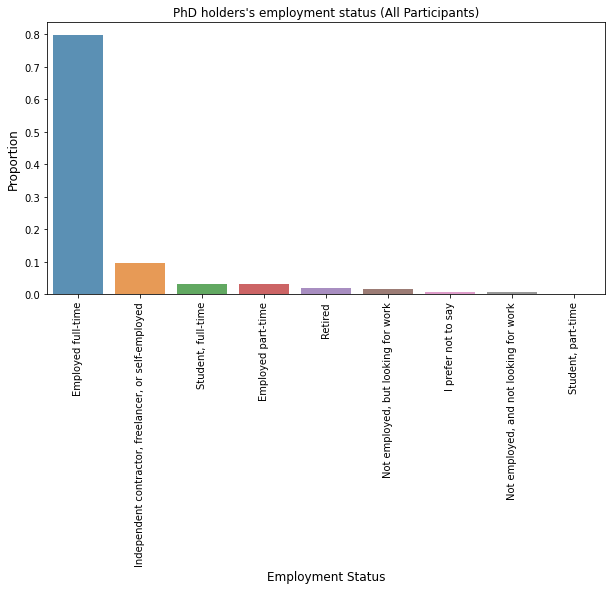

In [17]:
education_count = df[df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df[df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]
plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count.index, education_count.values, alpha=0.8)
plt.title("PhD holders's employment status (All Participants)")
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Employment Status', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

/Users/cagriaslan/PycharmProjects/Data-Scientist-Nanodegree-Project-One/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


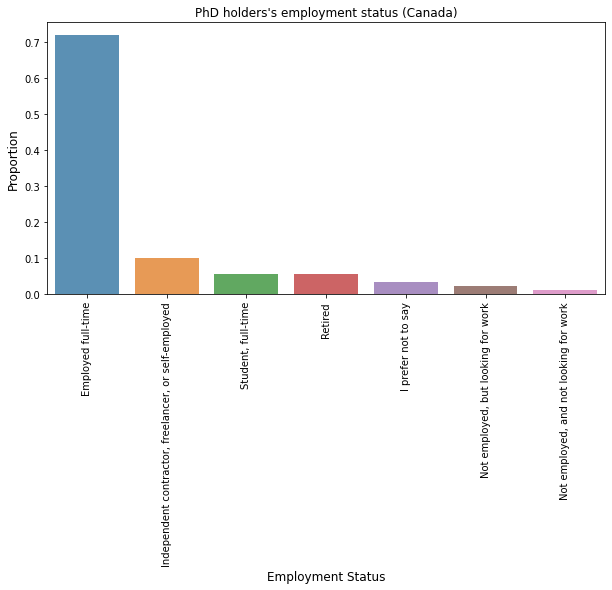

In [18]:
education_count = df_Canada[df_Canada['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df_Canada[df_Canada['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]
plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count.index, education_count.values, alpha=0.8)
plt.title("PhD holders's employment status (Canada)")
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Employment Status', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

/Users/cagriaslan/PycharmProjects/Data-Scientist-Nanodegree-Project-One/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


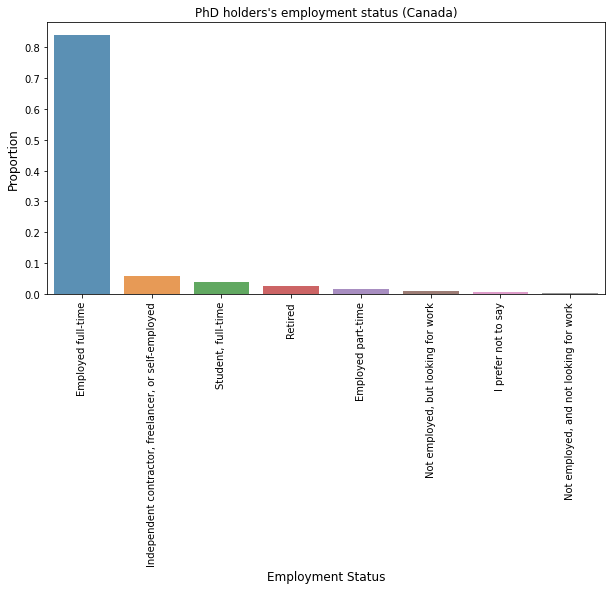

In [19]:
education_count = df_USA[df_USA['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].value_counts()/df_USA[df_USA['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)']['Employment'].shape[0]
plt.figure(figsize=(10,5))
sns_barplot=sns.barplot(education_count.index, education_count.values, alpha=0.8)
plt.title("PhD holders's employment status (Canada)")
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Employment Status', fontsize=12)
for item in sns_barplot.get_xticklabels():
    item.set_rotation(90)
plt.show()

It looks like PhD has a big impact on employment rate since very big portion of PhD holders are employed full-time.

### Question 2: How People are paid regarding the years of work? 

In [20]:
# Let's initialize the survey results againg and see what is the percentage of null values
df=pd.read_csv('survey_results_public.csv')

In [21]:
df["CompTotal"].isna().sum()/df["CompTotal"].shape[0]

0.4345210273373363

In [23]:
# It looks like there are plenty of them. Let's eliminate them.
df.dropna(subset=["CompTotal", "YearsCode"],inplace=True)

In [24]:
#create new data frame and just include interested columns
df1=df[["CompTotal","YearsCode"]]

In [26]:
#Check null values
df1.isnull().sum()

CompTotal    0
YearsCode    0
dtype: int64

In [29]:
#Lets sort 
df1 = df1.sort_values("YearsCode")
df1 = df1[df1["YearsCode"] != "More than 50 years"]
df1 = df1[df1["YearsCode"] != "Less than 1 year"]

In [30]:
#Lets convert all to numeric
df1["YearsCode"] = pd.to_numeric(df1["YearsCode"])
df1["CompTotal"] = pd.to_numeric(df1["CompTotal"])

In [31]:
# It is understood from the data that there are several outliers and this is eliminated using a top Compensation of 10000000
df1 = df1[df1["CompTotal"] < 10000000]

In [32]:
#Statistical information of all data set
df1_count = df1.groupby("YearsCode", as_index=False).count()

In [33]:
df1_count.head()

,YearsCode,CompTotal
0,1,207
1,2,606
2,3,1166
3,4,1762
4,5,2632


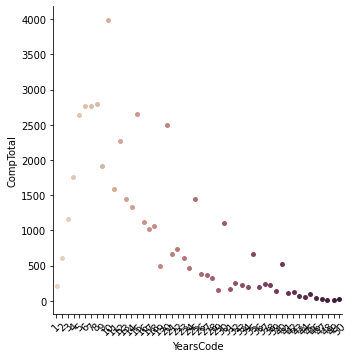

In [34]:
#bar chart of all data count
chart=sns.catplot(x="YearsCode", y="CompTotal", palette="ch:.25", data=df1_count)
chart.set_xticklabels(rotation=45);

In [35]:
#Mean information of all data set
df1_mean = df1.groupby("YearsCode", as_index=False).mean()

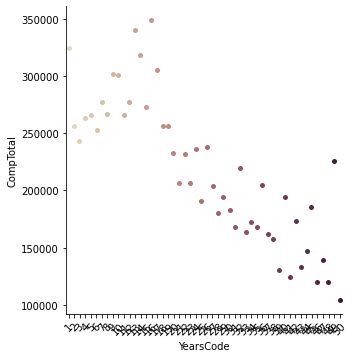

In [36]:
#bar chart of mean

chart=sns.catplot(x="YearsCode", y="CompTotal", palette="ch:.30", data=df1_mean)
chart.set_xticklabels(rotation=45);


It looks like mean compensation drops after 15-17 years of working. This can be due to the technical expertise since there weren't many technologies if you are working for about 50 years. Also our data has more input points from 5-10 years of experienced people. This can be interpreted as older people dont like to participate or hang around on Stackoverflow.

### Question 3: How "Salary" is related to the year of starting to code?

In [37]:
# Let's initialize the survey results againg and see what is the percentage of null values
df=pd.read_csv('survey_results_public.csv')

In [38]:
#drop null values in interested columns for this question
df.dropna(subset=["CompTotal", "Age1stCode"],inplace=True)

In [39]:
df_compare = df[["CompTotal","Age1stCode"]]

In [40]:
df_compare = df_compare[df_compare["CompTotal"] < 10000000]

In [41]:
df_compare.groupby("Age1stCode").mean()

,CompTotal
Age1stCode,
11 - 17 years,235861.325409
18 - 24 years,358371.381051
25 - 34 years,247868.419368
35 - 44 years,248233.174515
45 - 54 years,198124.178694
5 - 10 years,196492.898394
55 - 64 years,160453.703704
Older than 64 years,257400.000000
Younger than 5 years,316729.392523


It can be seen that 18-24 years group makes the most. Second group is older than 64 years. This may be due to the fact that they can be executives grown interest to coding.

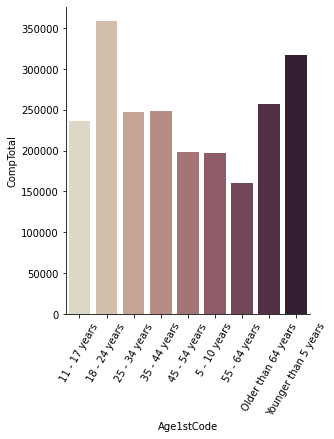

In [42]:
#bar chart of mean

chart=sns.catplot(x="Age1stCode", y="CompTotal", kind="bar", palette="ch:.30", data=df_compare.groupby("Age1stCode", as_index=False).mean())
chart.set_xticklabels(rotation=60);